In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## CWXP

In [ ]:
cwxp = np.load("/content/drive/MyDrive/PRotBert/state_sequence_full/final_CWxP_full_cls_pdb_class.npy", allow_pickle=True)

In [ ]:
def tsne(data, lr, name):
  class_list = []
  for i, _ in enumerate(data):
    cwxp_class = data[i]['class']
    class_list.append(cwxp_class)

  cls_list = []
  for i, _ in enumerate(data):
    cls = data[i]['cls']
    cls_list.append(cls)

  cls_list_np = np.array(cls_list)
  print(cls_list_np.shape)

  cls_df = pd.DataFrame(cls_list_np)
  model = TSNE(learning_rate = lr) # lr = 10 ~ 1000

  tsne_features = model.fit_transform(cls_df) # turn high dimension to 2 dimension(2 column)
  cls_df['x'] = tsne_features[:,0]
  cls_df['y'] = tsne_features[:,1]

  width = 1.5
  fig, ax1 = plt.subplots(figsize = [5,3.5], dpi = 600)

  for axis in ['top', 'bottom', 'left', 'right']:
      ax1.spines[axis].set_linewidth(width)

  tick_width = 0.5
  plt.tick_params(direction = 'in', width = tick_width)
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)

  scatterplot = sns.scatterplot(x='x',y='y', hue=class_list, data=cls_df)
  scatterplot.legend(loc = (1.1,-1))
  #sns.scatterplot(df)

  plt.title(f't-SNE of {name}')
  plt.show()

(168, 1024)


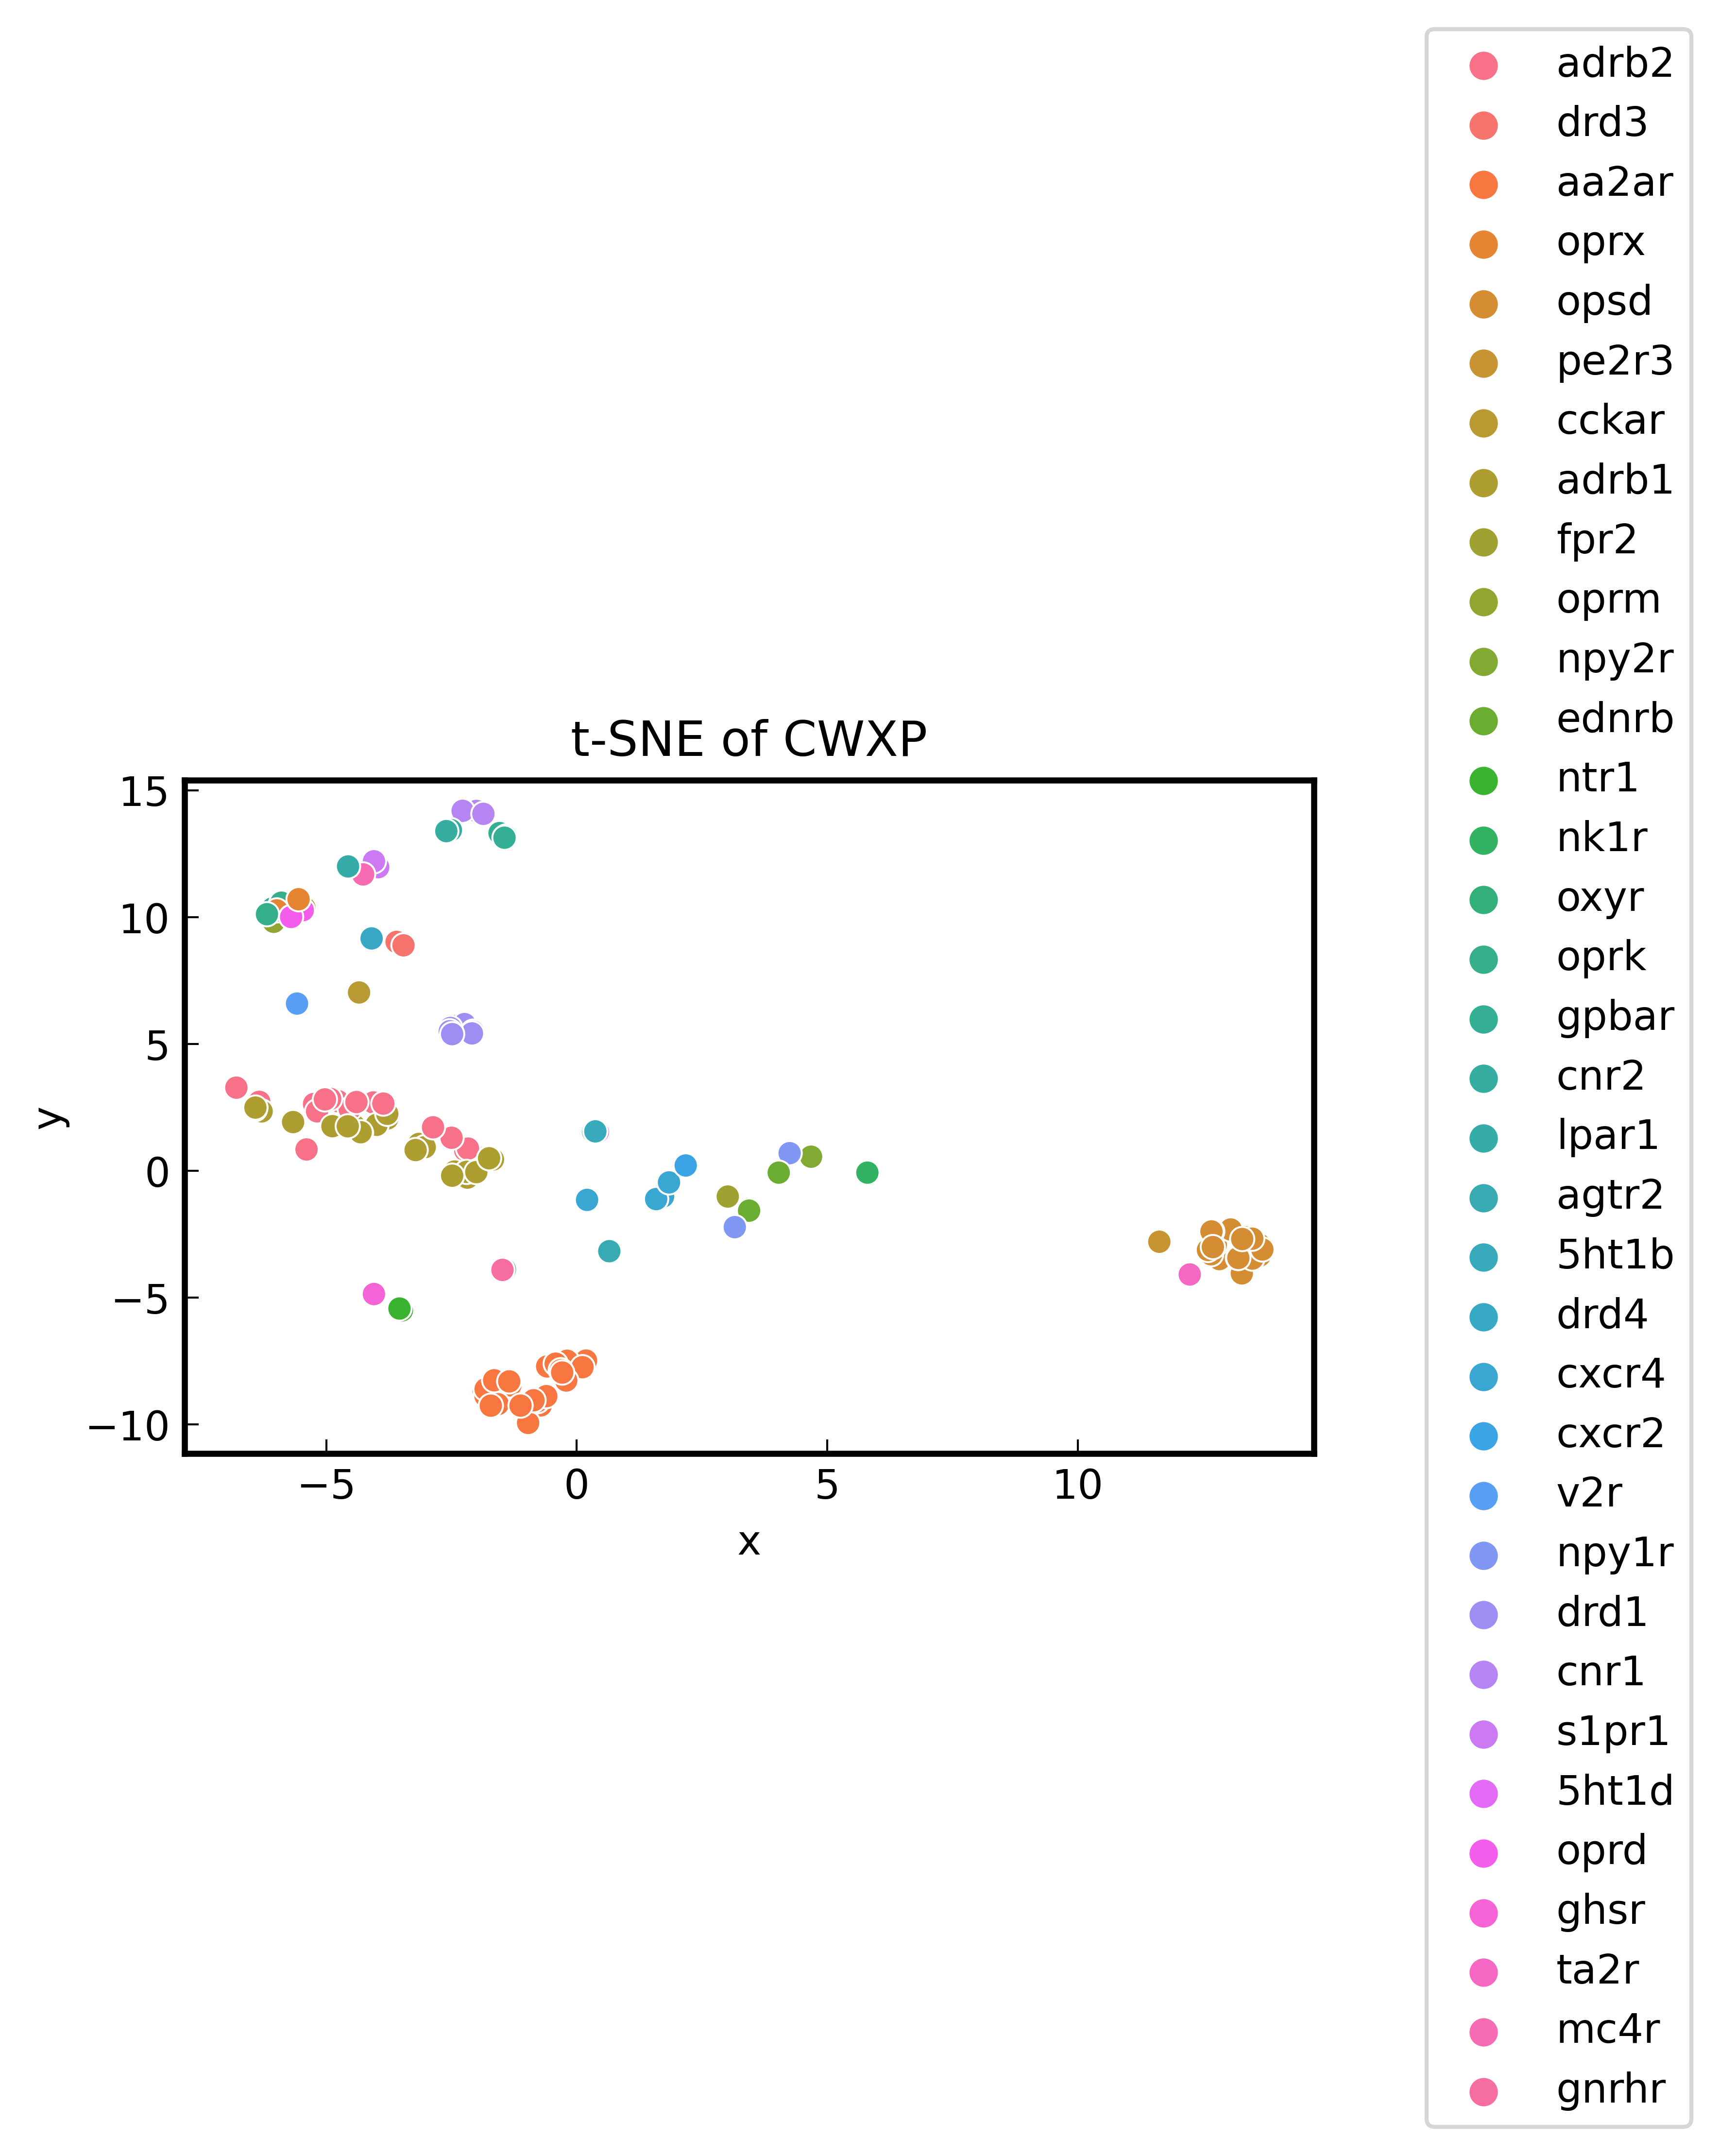

In [ ]:
tsne(cwxp,300,name = 'CWXP')

### PXXG

In [ ]:
pxxg = np.load("/content/drive/MyDrive/PRotBert/state_sequence_full/final_PxxG_full_cls_pdb_class.npy", allow_pickle=True)

(115, 1024)


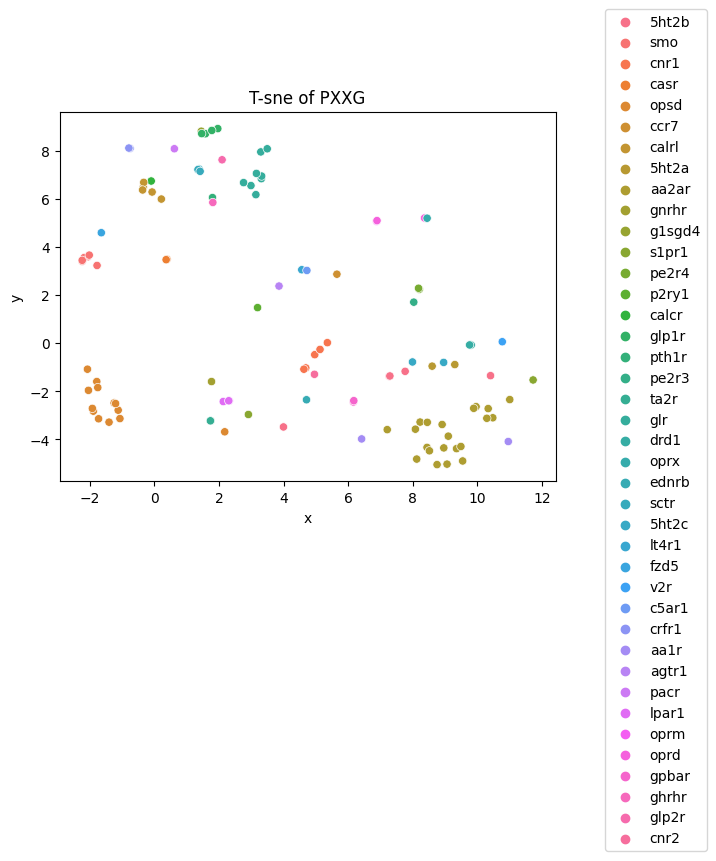

In [ ]:
tsne(pxxg, 200, name='PXXG')

## NPXXY

In [ ]:
npxxy = np.load("/content/drive/MyDrive/PRotBert/state_sequence_full/final_NPxxY_full_cls_pdb_class.npy", allow_pickle=True)

(235, 1024)


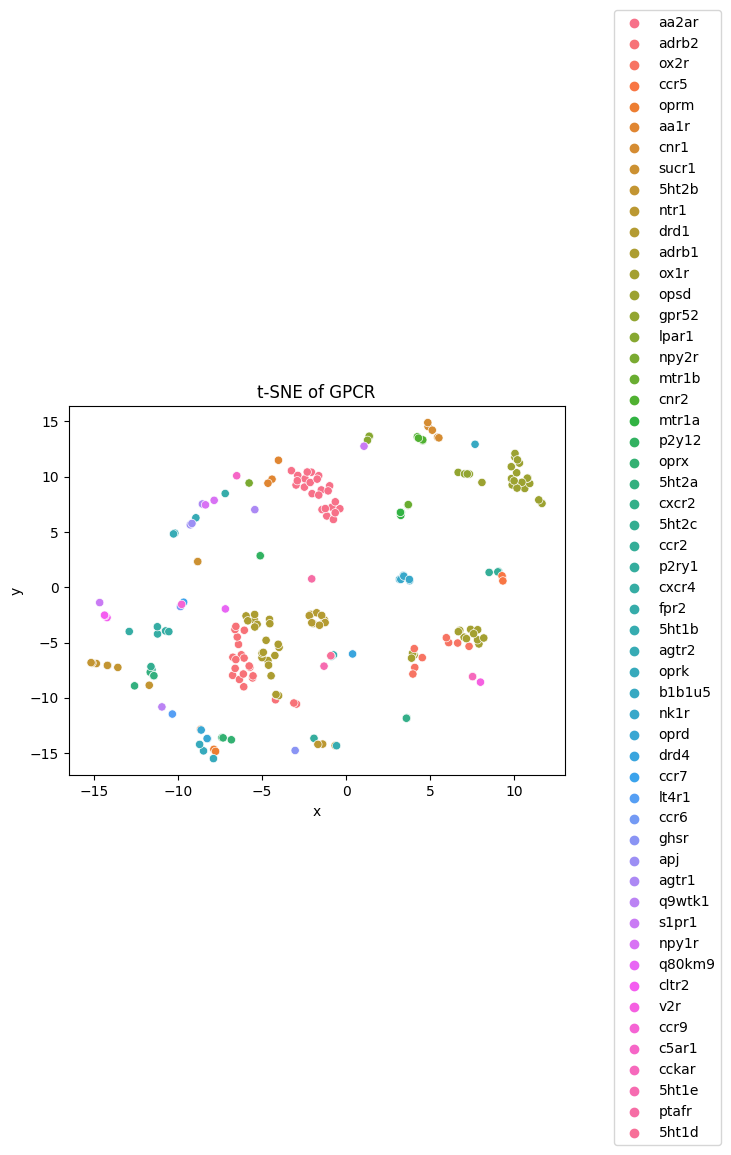

In [ ]:
tsne(npxxy, 400, name = 'GPCR')

### NPXXY without class that has 1~3 protein

In [ ]:
class_freq = {}
for d in npxxy:
    if d['class'] in class_freq:
        class_freq[d['class']] += 1
    else:
        class_freq[d['class']] = 1

# Remove dictionaries with unique classes
npxxy2 = [d for d in npxxy if class_freq[d['class']] > 3]

class_list = []
for i, _ in enumerate(npxxy2):
  clas = npxxy2[i]['class']
  class_list.append(clas)

element_counts = Counter(class_list)
for element, count in element_counts.items():
  print(f"{element}: {count}")

aa2ar: 24
adrb2: 21
ox2r: 8
cnr1: 5
5ht2b: 8
ntr1: 4
drd1: 9
adrb1: 21
ox1r: 14
opsd: 19
gpr52: 4
cnr2: 4
mtr1a: 4
5ht2a: 4
cxcr4: 5
nk1r: 6
cltr2: 4


(164, 1024)


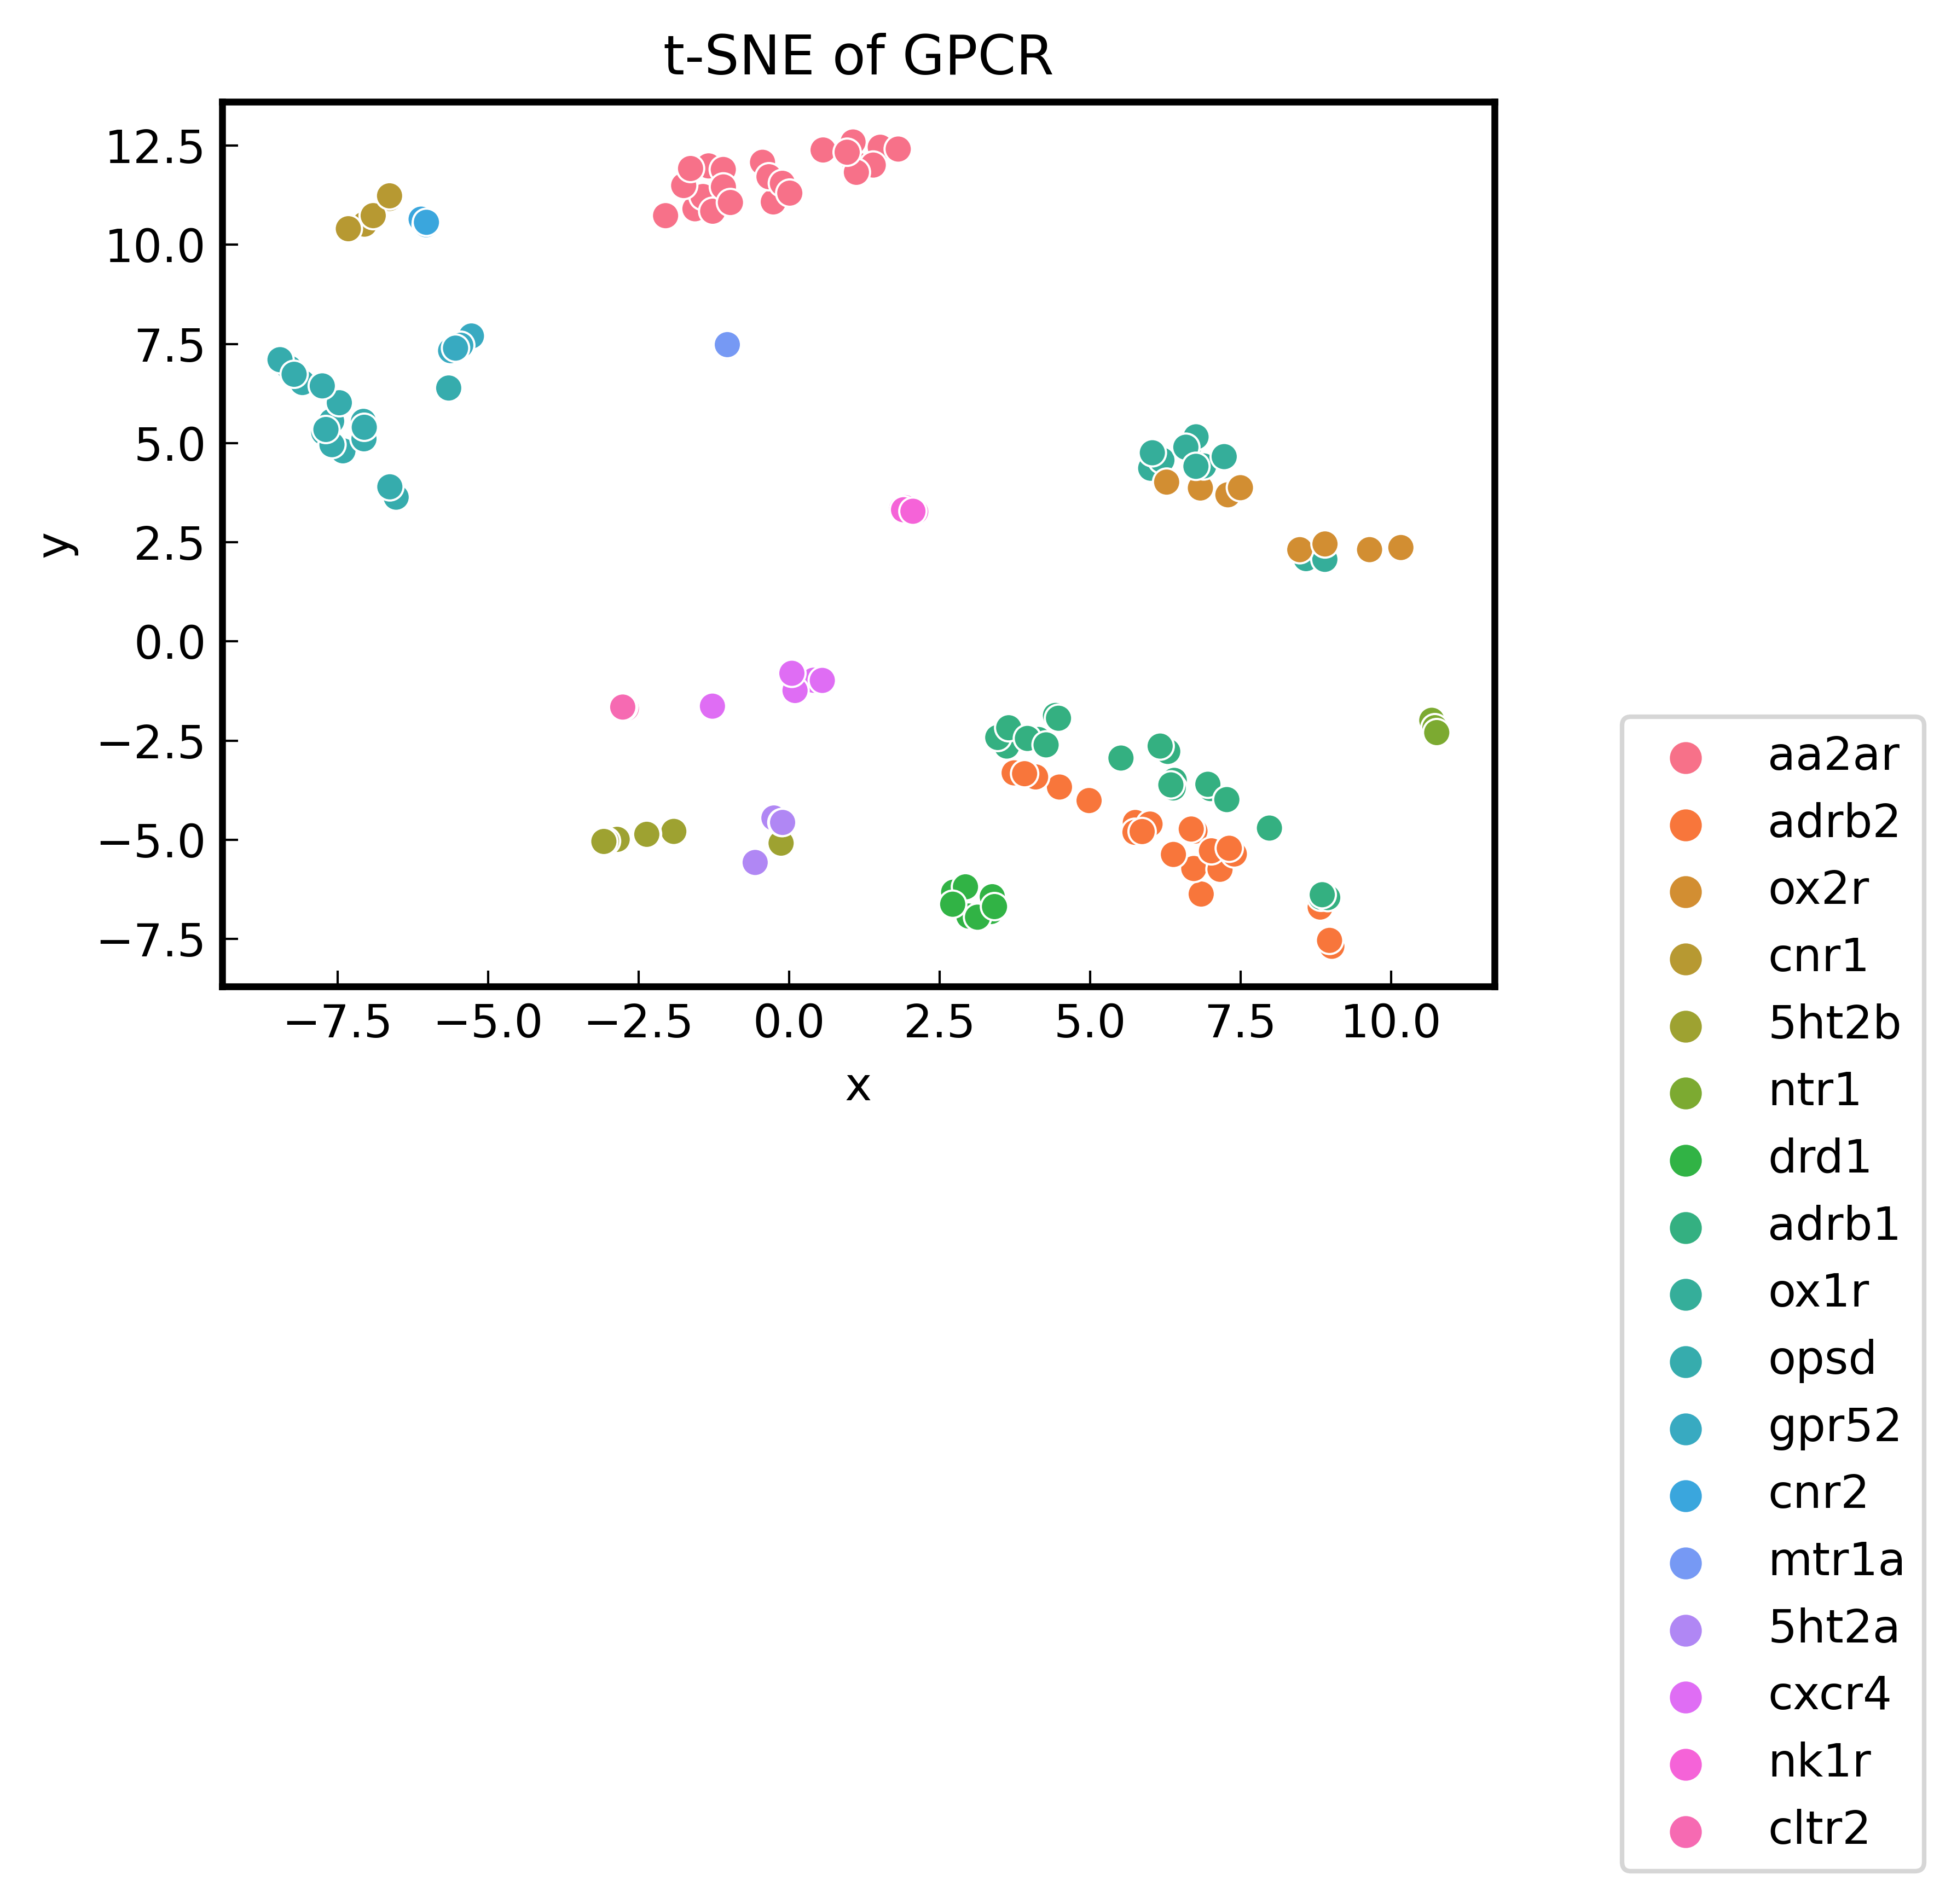

In [ ]:
tsne(npxxy2, 300, name = 'GPCR')